# Visualizations

In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [12]:
babynames = pd.read_csv(r'C:\Users\Nick\Documents\Projects\babynames\data\processed\ssa_babynames_1880_2024.csv')
babynames['sex'] = babynames['sex'].astype('category')
babynames['year'] = babynames['year'].astype(int)

## 1. TIME-BASED TRENDS

### Total Births per Year (1880 - 2024)

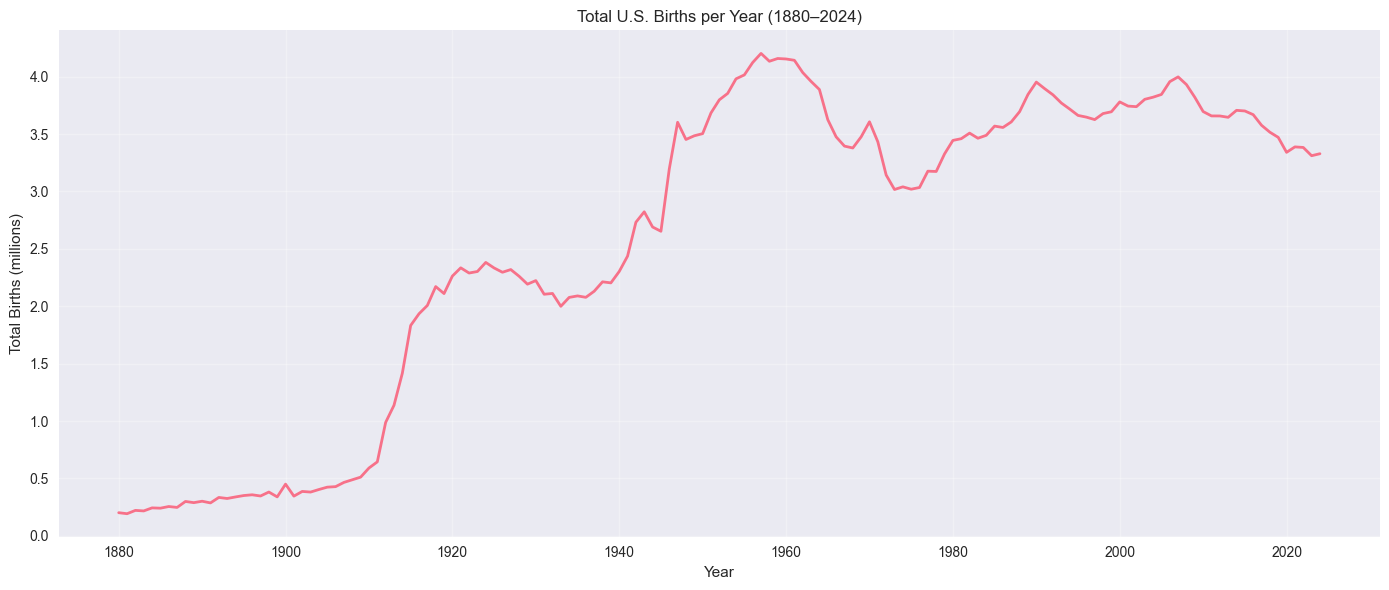

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

yearly_counts = babynames.groupby('year')['count'].sum() / 1_000_000

ax.plot(yearly_counts.index, yearly_counts.values, linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Total Births (millions)')
ax.set_title('Total U.S. Births per Year (1880–2024)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### U.S. Births by Gender (1880–2024)

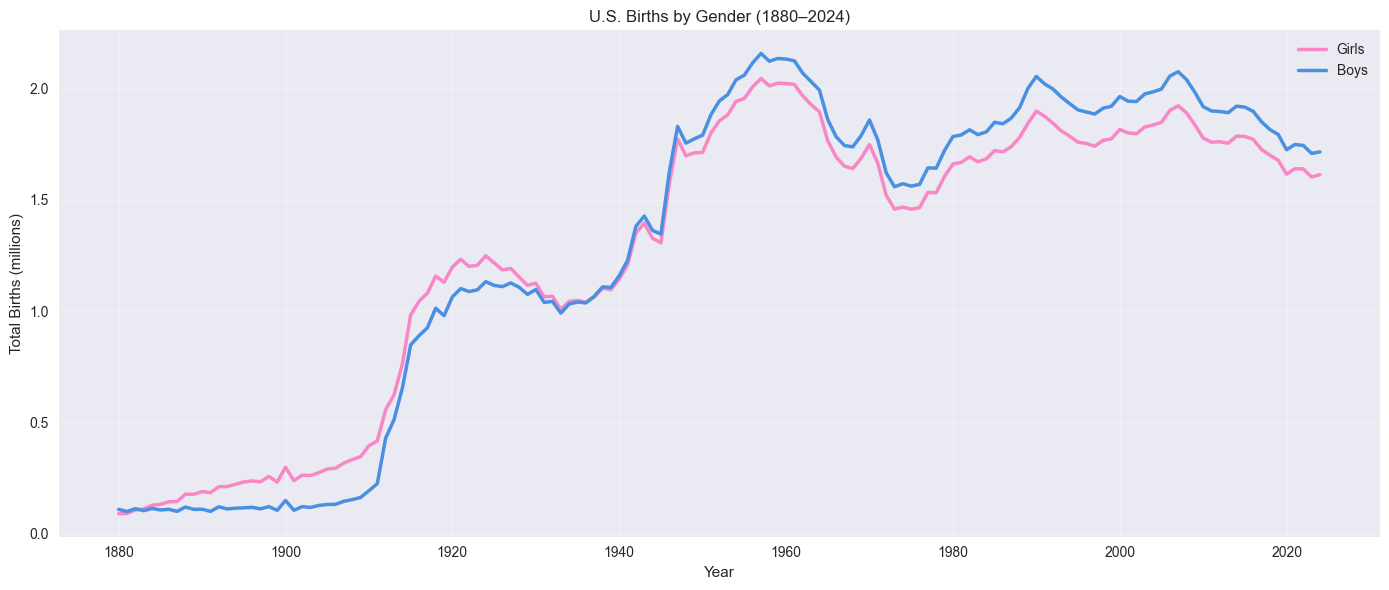

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))

gender_yearly = (
    babynames
    .groupby(['year', 'sex'])['count']
    .sum()
    .unstack()
    / 1_000_000  
)

ax.plot(
    gender_yearly.index,
    gender_yearly['F'],
    label='Girls',
    color='#f987c5',
    linewidth=2.5
)

ax.plot(
    gender_yearly.index,
    gender_yearly['M'],
    label='Boys',
    color='#4a90e2',
    linewidth=2.5
)

ax.set_xlabel('Year')
ax.set_ylabel('Total Births (millions)')
ax.set_title('U.S. Births by Gender (1880–2024)')
ax.legend(frameon=False)
ax.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()


### Gender Ratio Over Time (1880-2024)

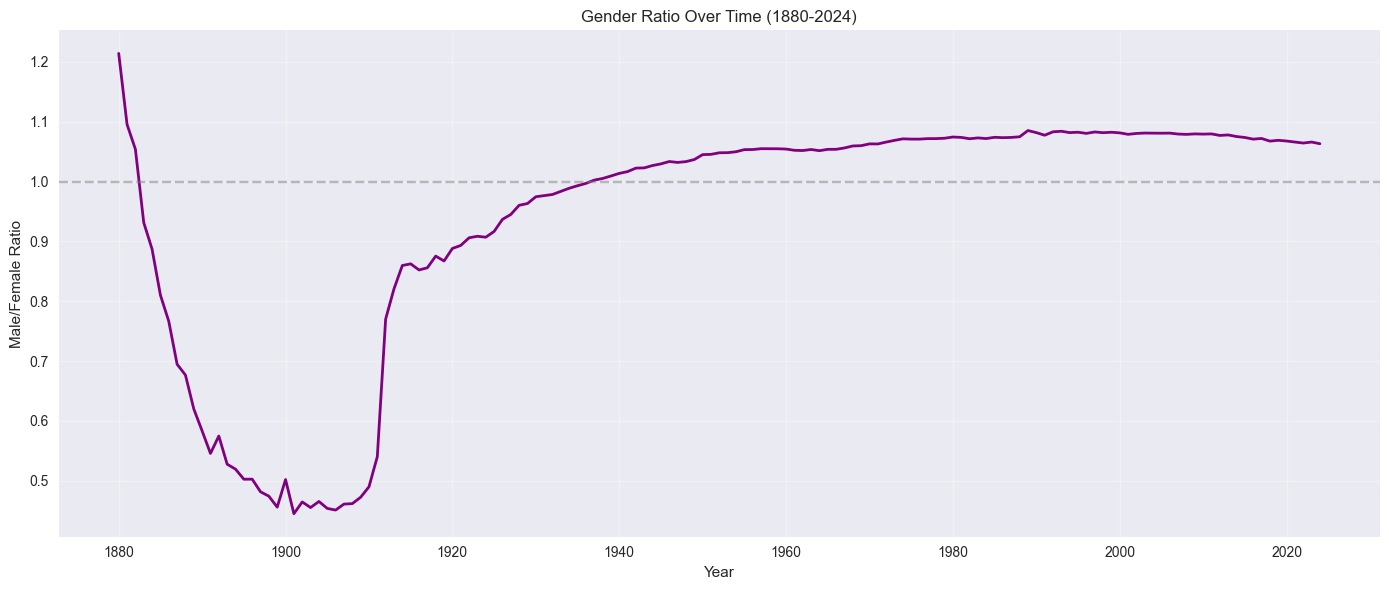

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))
gender_ratio = babynames.groupby('year').apply(lambda x: x[x['sex']=='M']['count'].sum() / x[x['sex']=='F']['count'].sum())
ax.plot(gender_ratio.index, gender_ratio.values, linewidth=2, color='purple')
ax.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Male/Female Ratio')
ax.set_title('Gender Ratio Over Time (1880-2024)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Top 10 Names by Generation

In [16]:
generation_ranges = {
    'Lost Generation': (1883, 1900),
    'Greatest Generation': (1901, 1927),
    'Silent Generation': (1928, 1945),
    'Baby Boomers': (1946, 1964),
    'Generation X': (1965, 1980),
    'Millennials (Gen Y)': (1981, 1996),
    'Generation Z': (1997, 2012),
    'Generation Alpha': (2013, 2024)
}

def get_generation_data(df, gen_name, year_range):
    start, end = year_range
    gen_data = df[(df['year'] >= start) & (df['year'] <= end)].copy()
    top_names = gen_data.groupby(['name', 'sex'])['count'].sum().sort_values(ascending=False).head(10).reset_index()
    return top_names

generation_data = {}
for gen_name, year_range in generation_ranges.items():
    generation_data[gen_name] = get_generation_data(babynames, gen_name, year_range)

print(f'Data prepared for {len(generation_data)} generations')

Data prepared for 8 generations


In [17]:
import matplotlib.pyplot as plt
import numpy as np

girl_color = '#FE5BAC'
boy_color = '#4895EF'

def create_generation_plot(gen_name, data):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    start, end = generation_ranges[gen_name]
    
    y_pos = range(len(data))
    colors = [girl_color if sex == 'F' else boy_color for sex in data['sex']]
    
    bars = ax.barh(y_pos, data['count'], color=colors, alpha=0.85, edgecolor='white', linewidth=1.5)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data['name'], fontsize=11, fontweight='500')
    
    ax.invert_yaxis()
    ax.set_title(f'{gen_name}\n{start}–{end}',
                 fontsize=15, fontweight='bold', pad=15, color='#333')
    ax.set_xticks([])

    
    ax.tick_params(axis='x', labelsize=10, colors='#666')
    ax.tick_params(axis='y', labelsize=10, colors='#333')
    
    ax.grid(axis='x', alpha=0.15, color='#ccc')
    ax.set_axisbelow(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#ddd')
    
    return fig

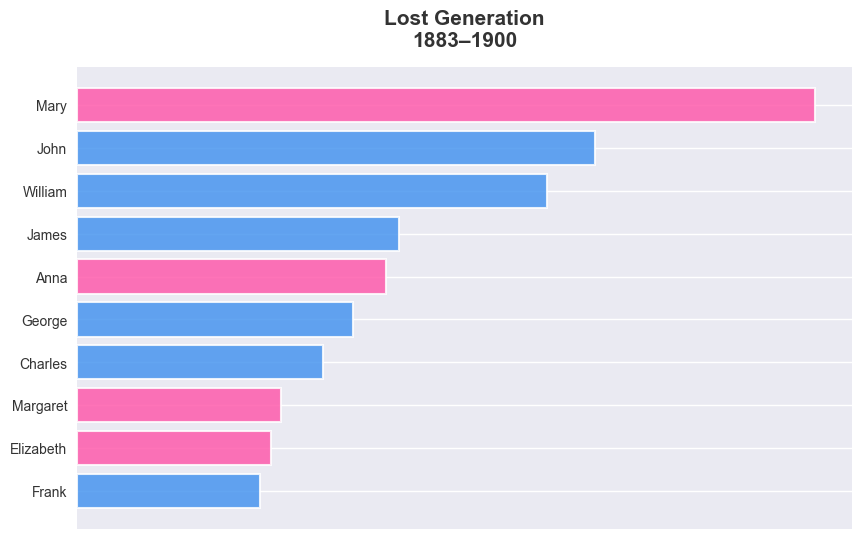

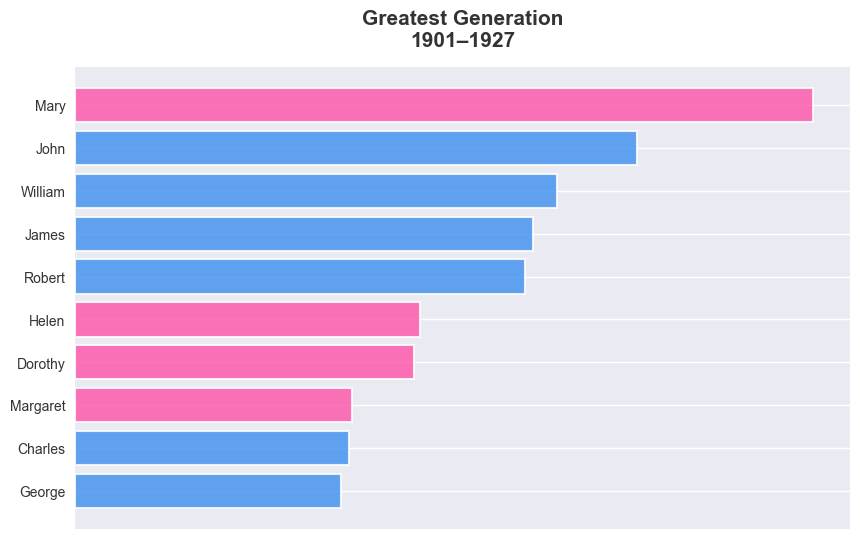

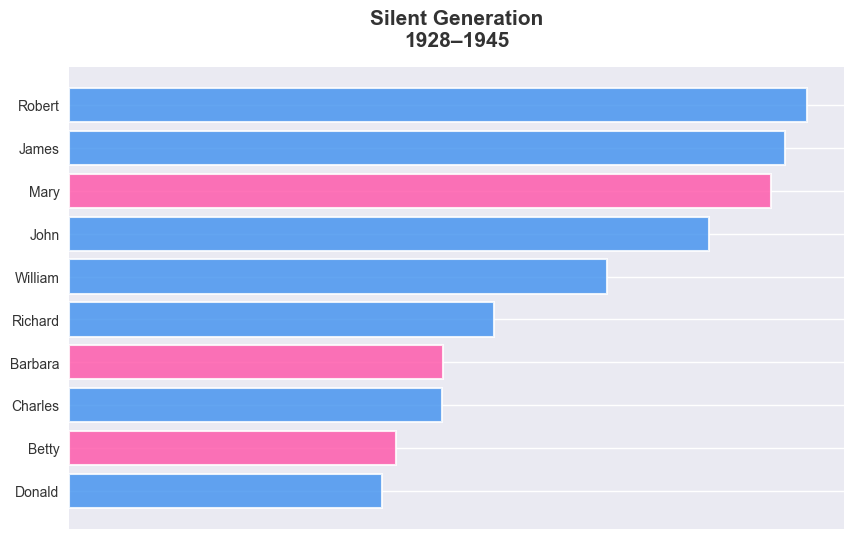

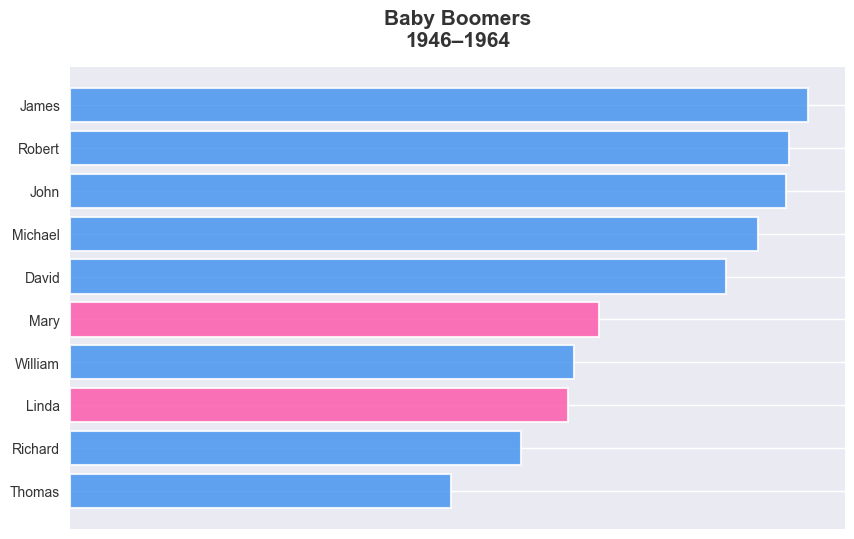

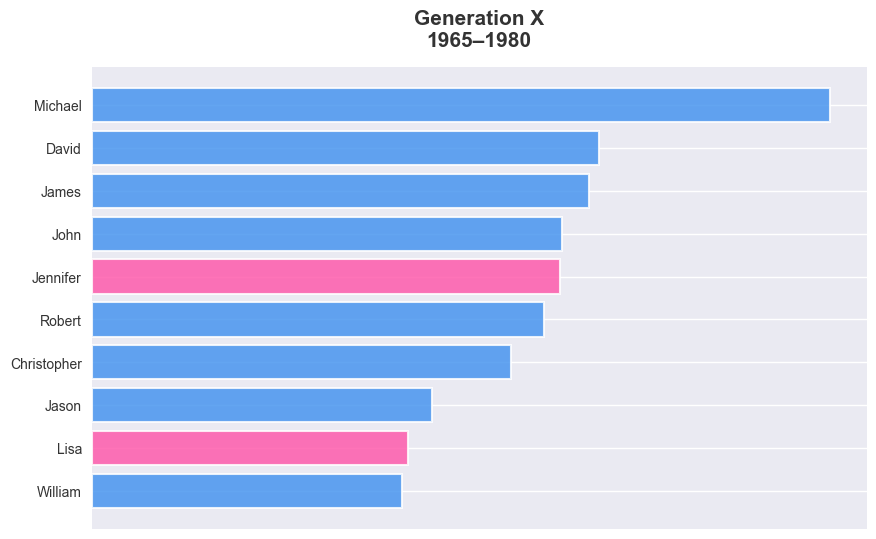

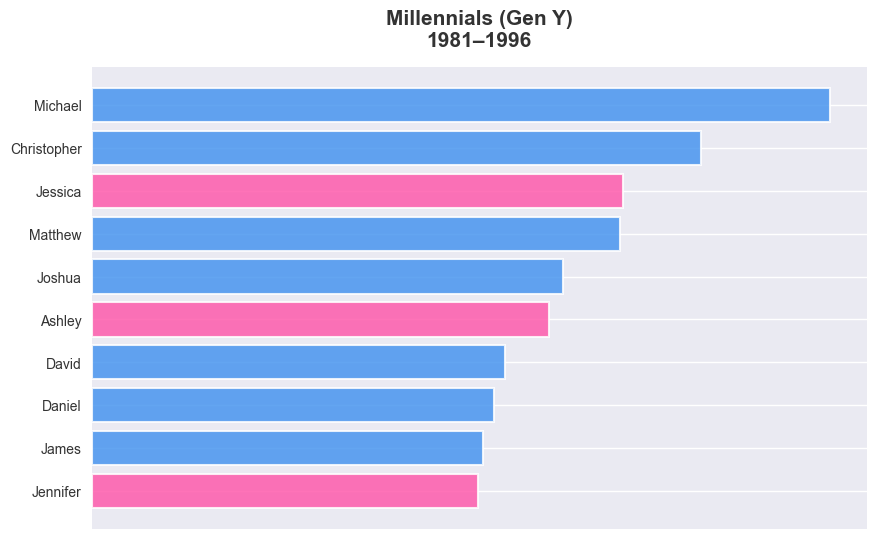

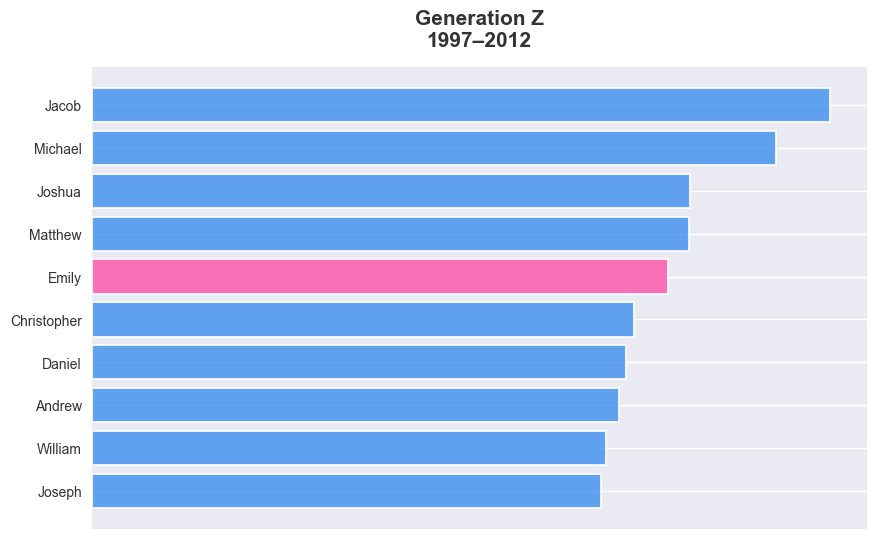

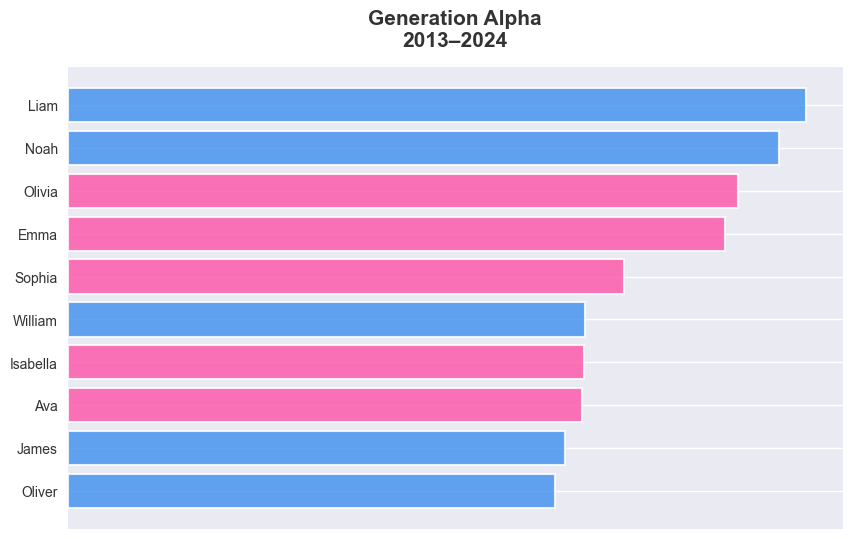

In [18]:
for gen_name, data in generation_data.items():
    if len(data) == 10:
        fig = create_generation_plot(gen_name, data)
        plt.show()
        plt.close(fig)
    else:
        print(f'Skipped {gen_name}: only {len(data)} names available')

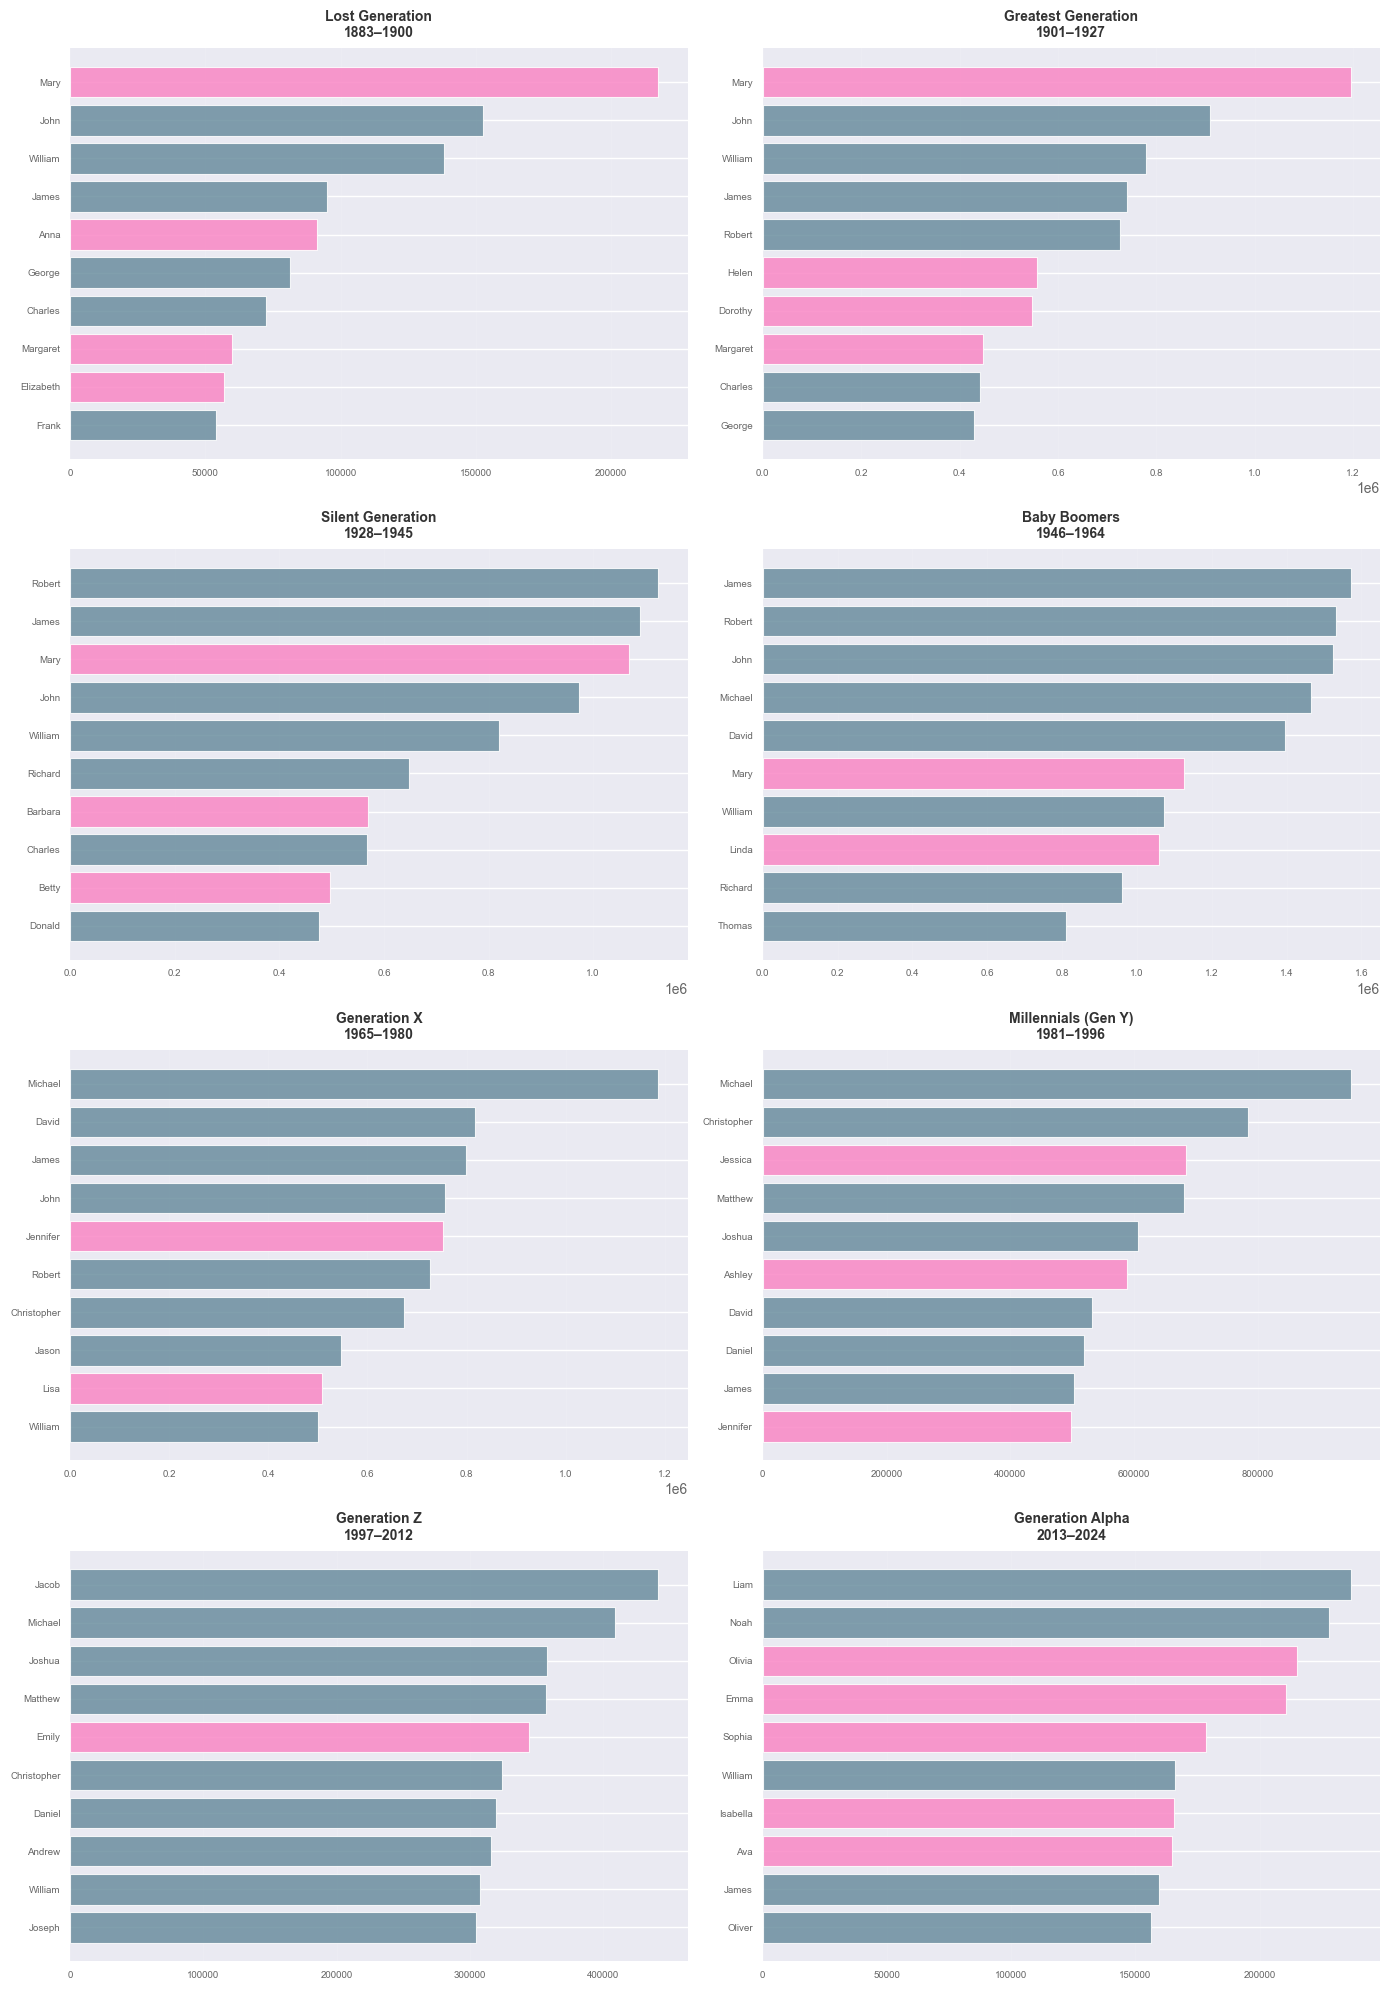

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(14, 20))
axes = axes.flatten()

girl_color = '#f987c5'
boy_color = '#6B8E9F'

for idx, (gen_name, data) in enumerate(generation_data.items()):
    if len(data) == 10:
        ax = axes[idx]
        
        start, end = generation_ranges[gen_name]
        
        y_pos = range(len(data))
        colors = [girl_color if sex == 'F' else boy_color for sex in data['sex']]
        
        ax.barh(y_pos, data['count'], color=colors, alpha=0.85, edgecolor='white', linewidth=0.8)
        
        ax.set_yticks(y_pos)
        ax.set_yticklabels(data['name'], fontsize=8)
        
        ax.invert_yaxis()
        ax.set_title(f'{gen_name}\n{start}–{end}', fontsize=10, fontweight='600', pad=8, color='#333')
        
        ax.tick_params(axis='both', labelsize=7, colors='#666')
        ax.grid(axis='x', alpha=0.1)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        axes[idx].text(0.5, 0.5, f'{gen_name}\nOnly {len(data)} names', ha='center', va='center', fontsize=9)
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Celebrity Inspired names

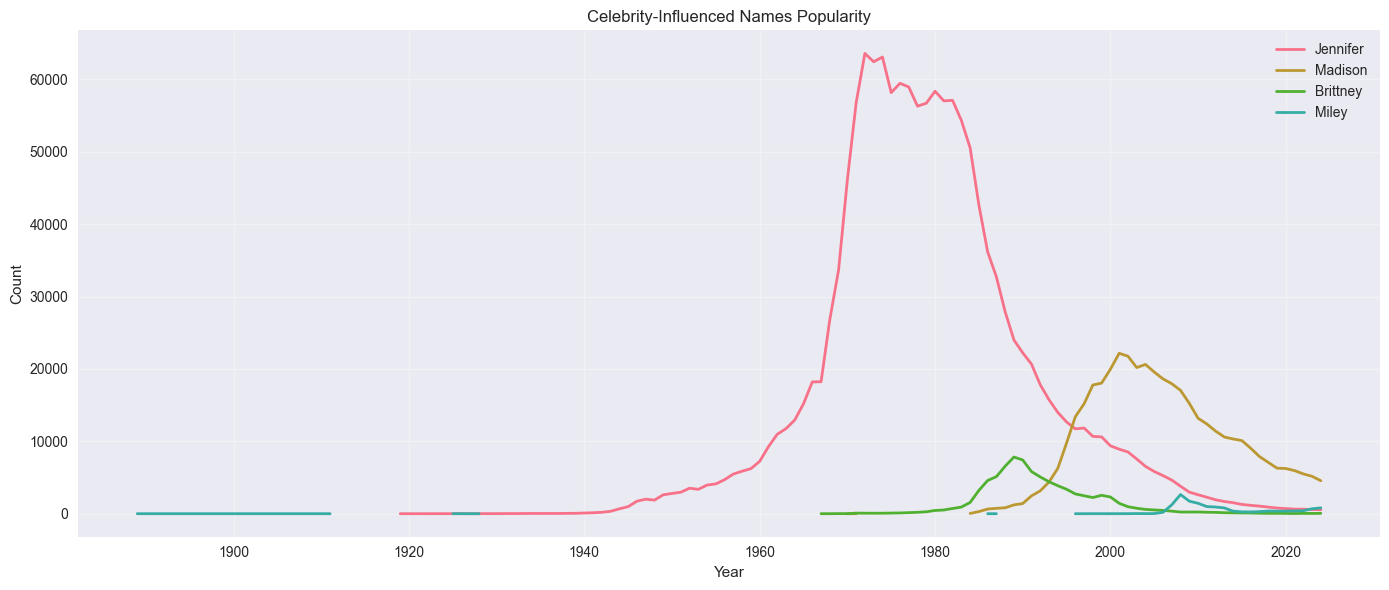

In [20]:
celebrity_names = ['Jennifer', 'Madison', 'Brittney', 'Miley']
celebrity_trends = babynames[babynames['name'].isin(celebrity_names) & (babynames['sex']=='F')].groupby(['year', 'name'])['count'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 6))
for name in celebrity_names:
    if name in celebrity_trends.columns:
        ax.plot(celebrity_trends.index, celebrity_trends[name], label=name, linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Celebrity-Influenced Names Popularity')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. RANKING VISUALIZATIONS

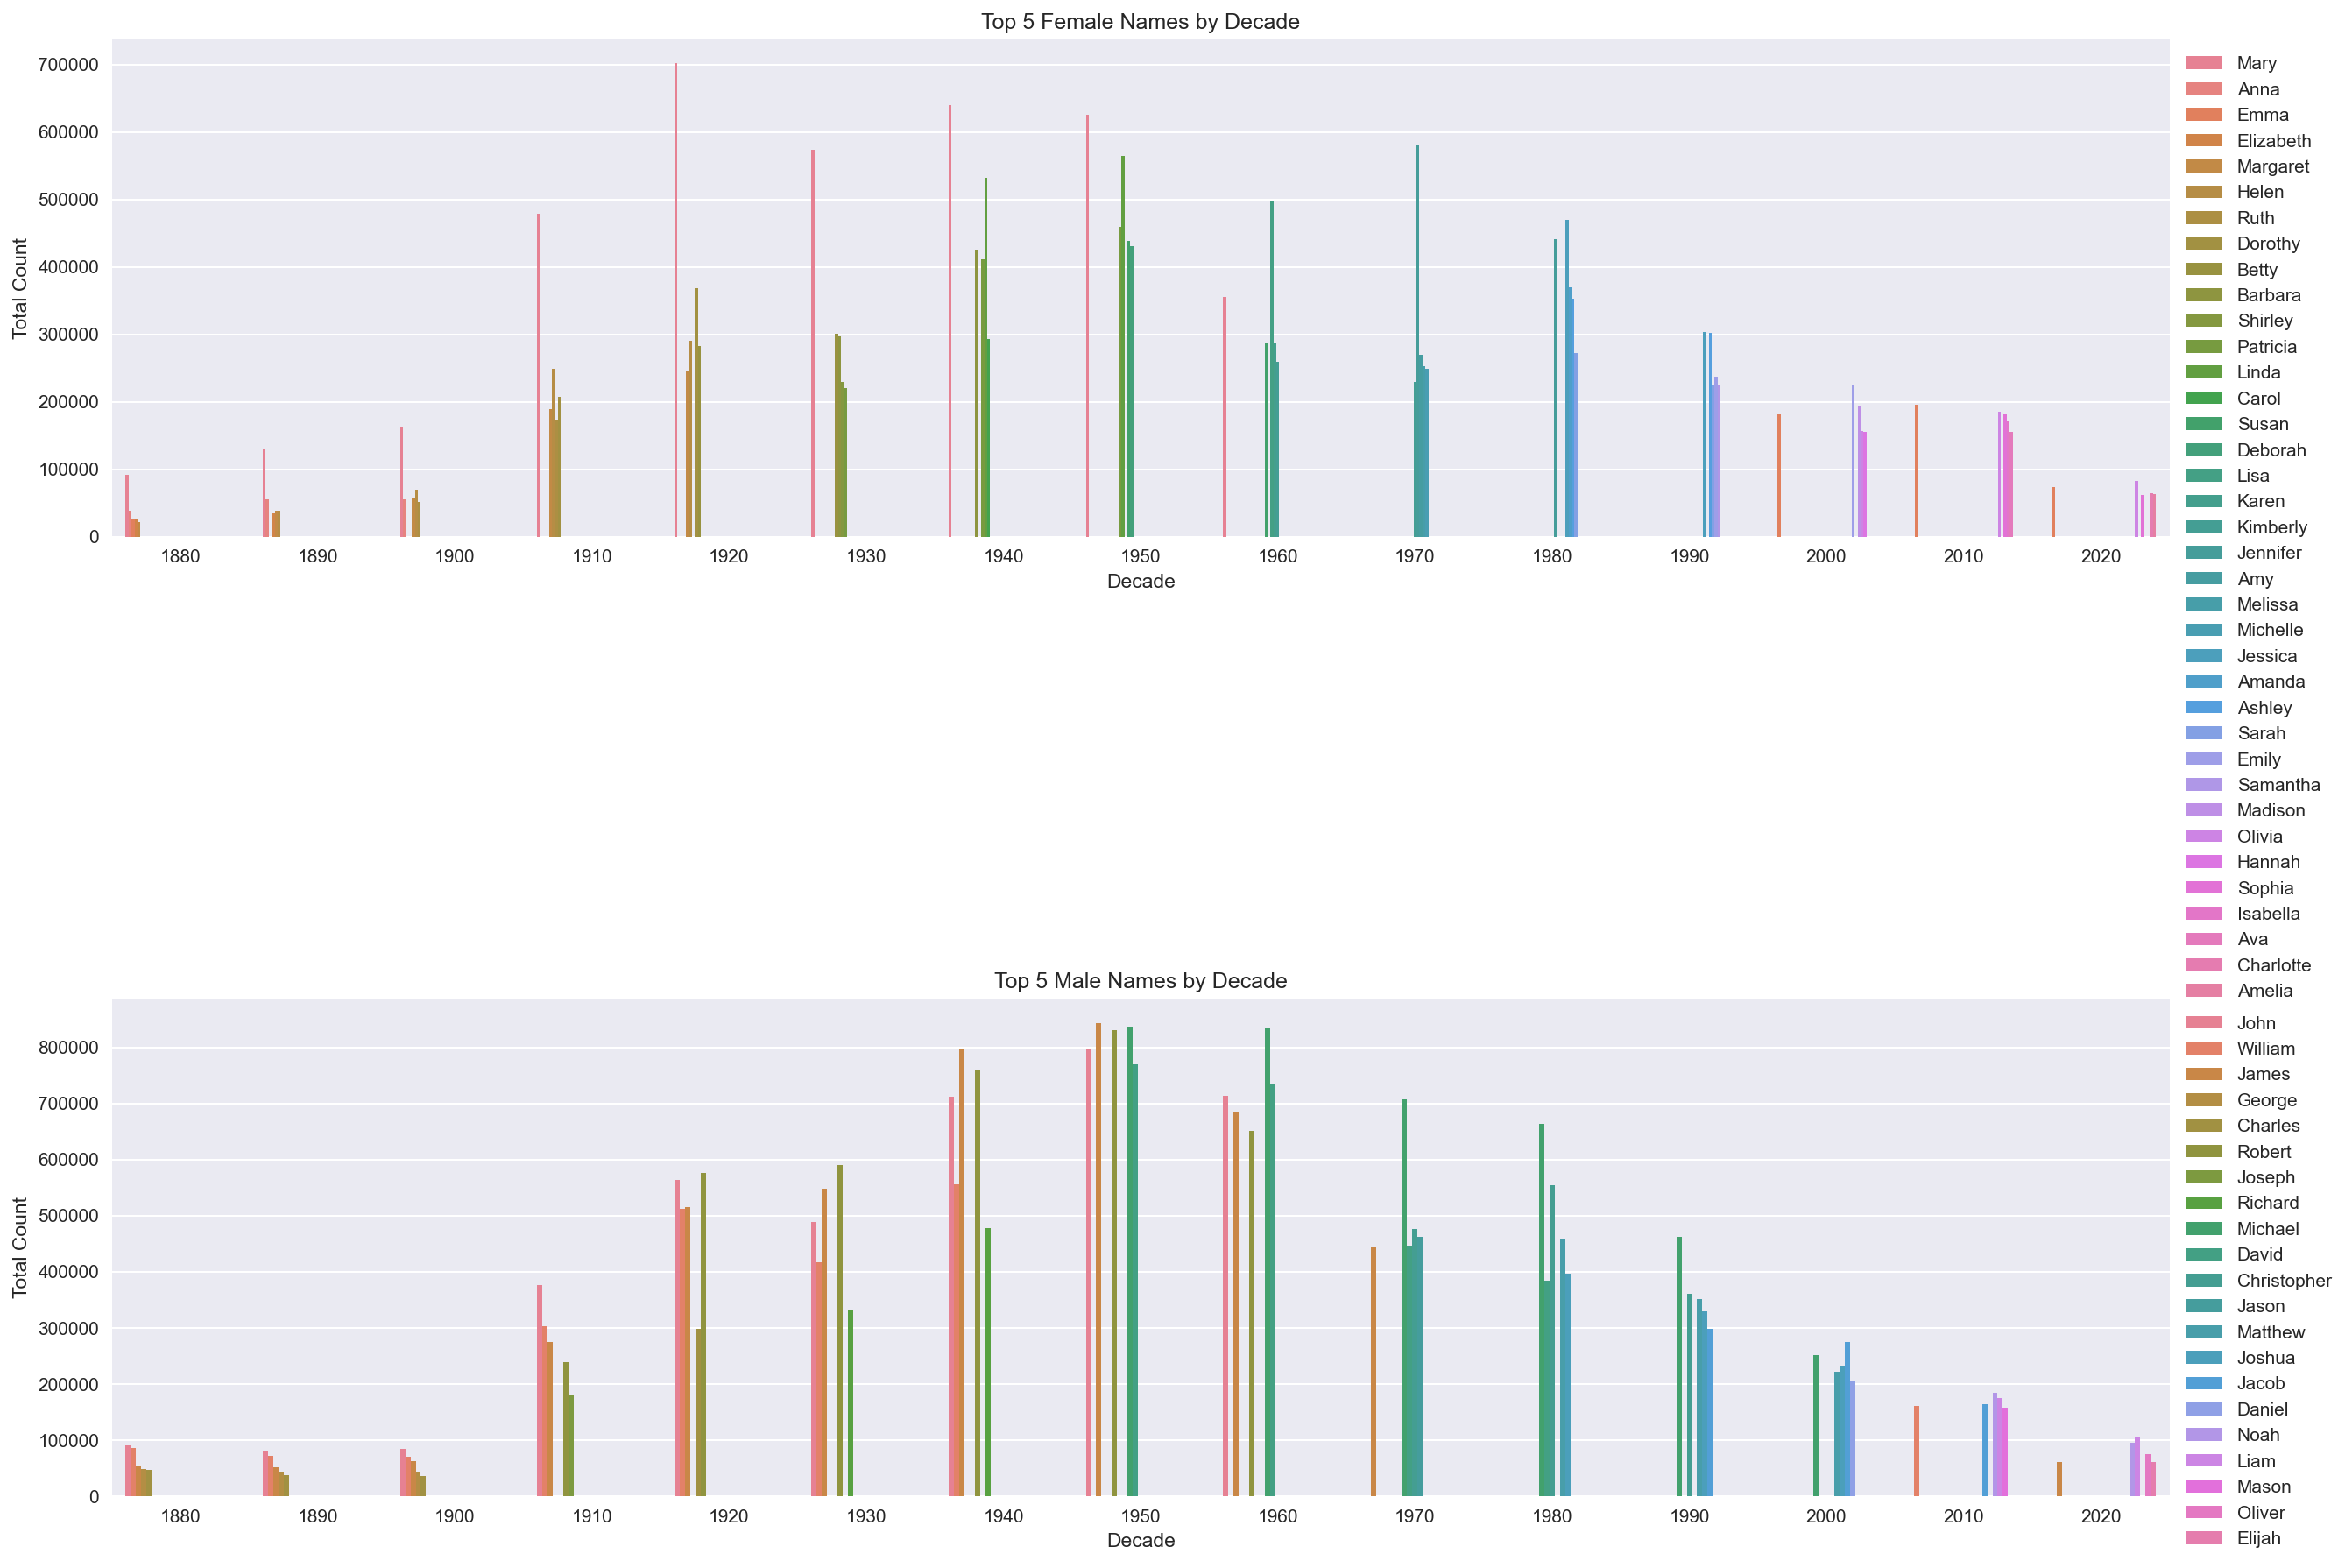

In [22]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 300

babynames['decade'] = (babynames['year'] // 10) * 10
top_by_decade_f = babynames[babynames['sex']=='F'].groupby(['decade', 'name'])['count'].sum().groupby('decade', group_keys=False).nlargest(5).reset_index()
top_by_decade_m = babynames[babynames['sex']=='M'].groupby(['decade', 'name'])['count'].sum().groupby('decade', group_keys=False).nlargest(5).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(18, 12), dpi=150)
sns.barplot(data=top_by_decade_f, x='decade', y='count', hue='name', ax=axes[0])
axes[0].set_title('Top 5 Female Names by Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Total Count')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

sns.barplot(data=top_by_decade_m, x='decade', y='count', hue='name', ax=axes[1])
axes[1].set_title('Top 5 Male Names by Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Total Count')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## 3. NAME DIVERSITY

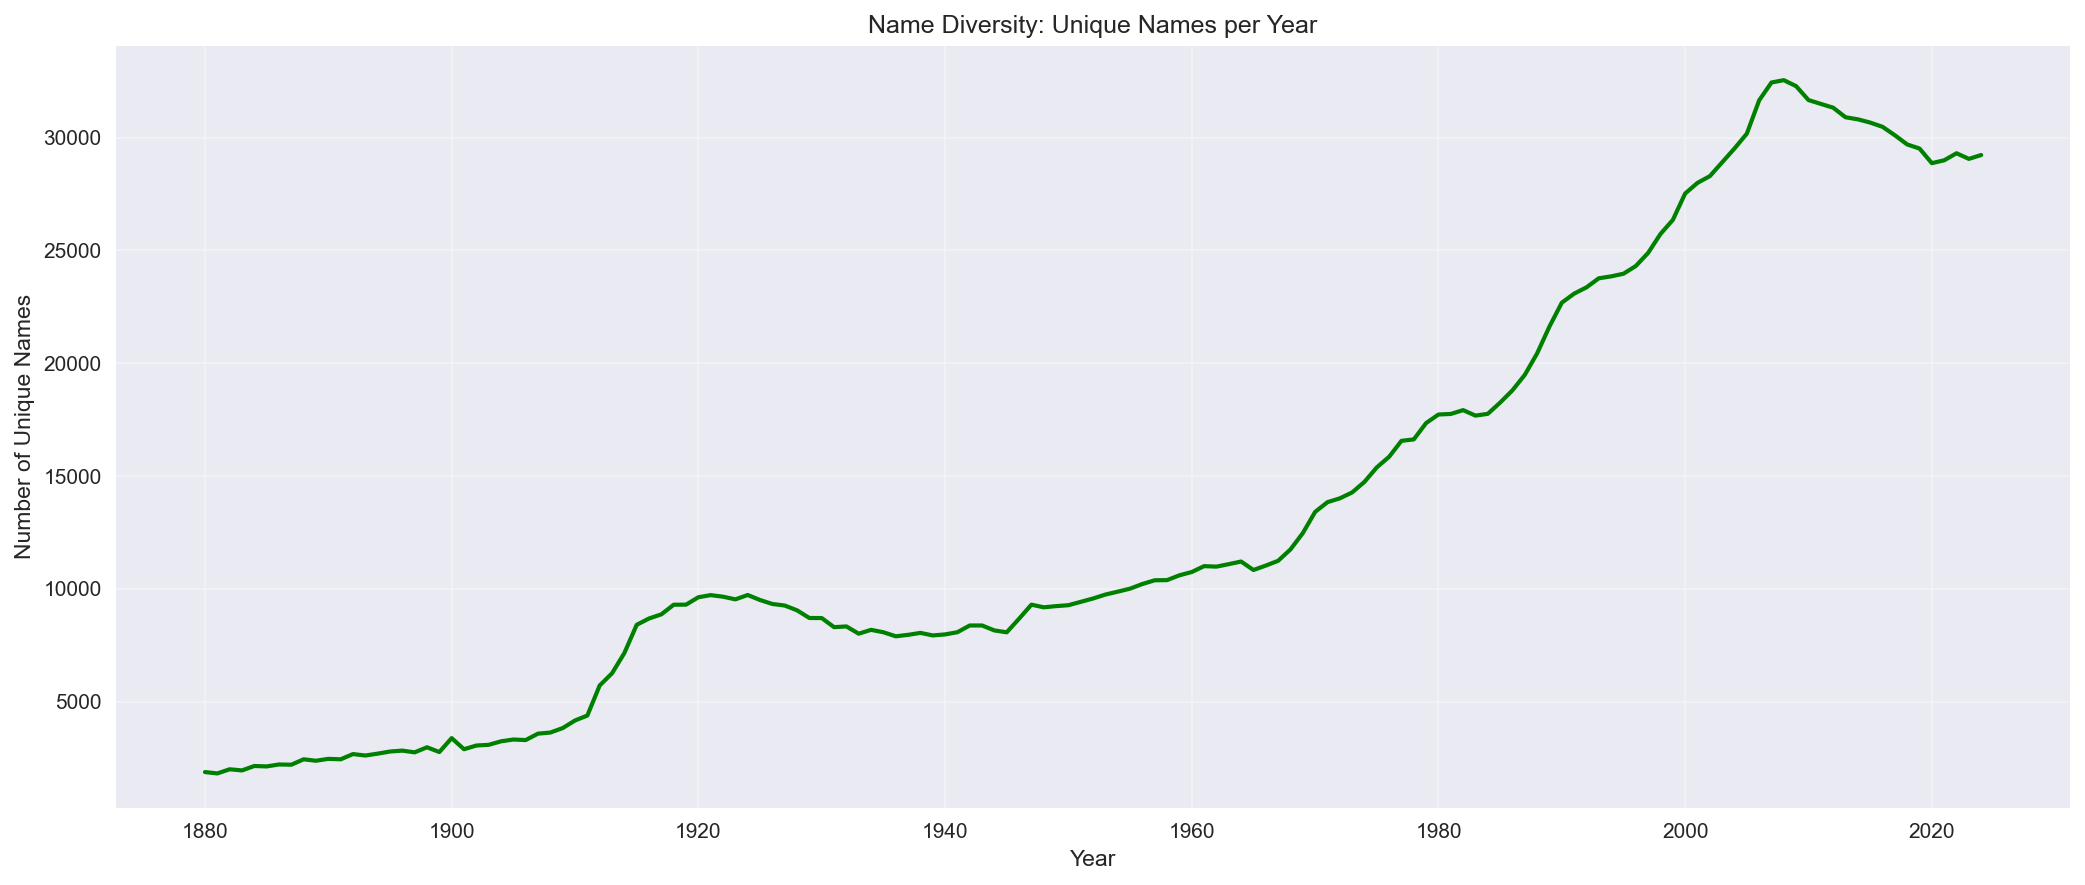

In [23]:
fig, ax = plt.subplots(figsize=(14, 6))
unique_names = babynames.groupby('year')['name'].nunique()
ax.plot(unique_names.index, unique_names.values, linewidth=2, color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Names')
ax.set_title('Name Diversity: Unique Names per Year')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

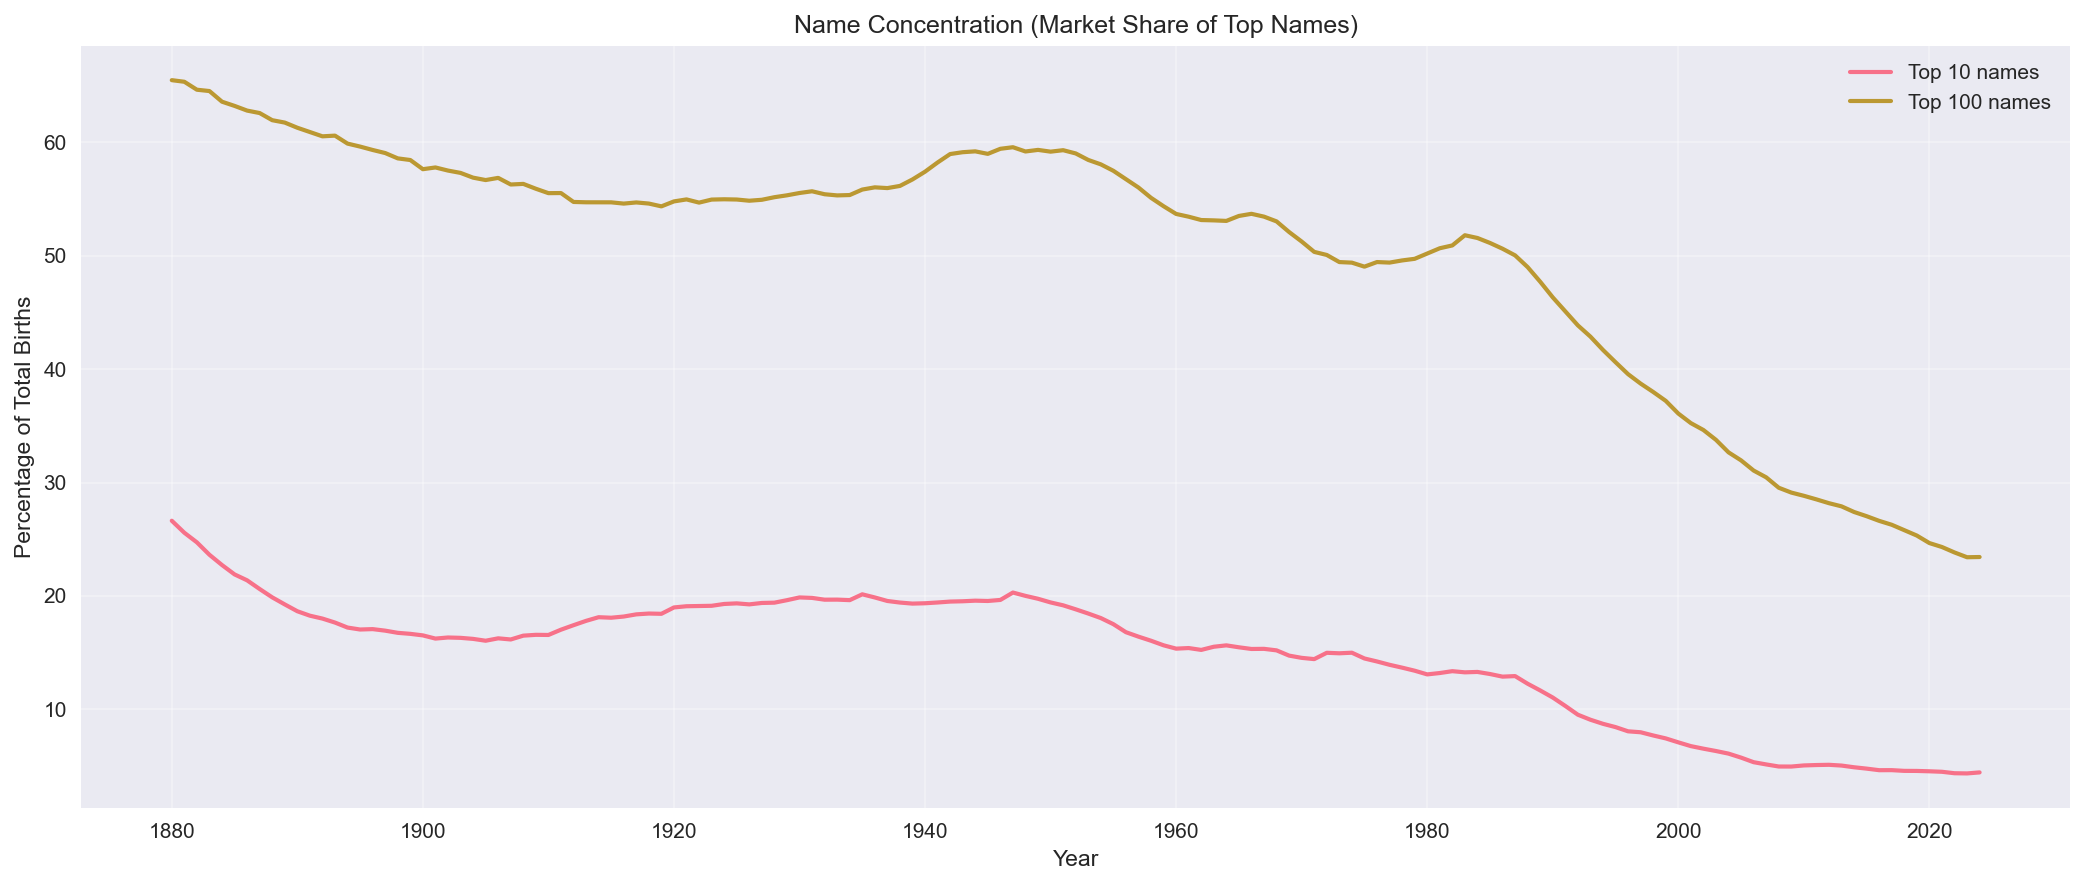

In [24]:
def concentration(df, year, n=10):
    year_data = df[df['year']==year]
    total = year_data['count'].sum()
    top_n = year_data.nlargest(n, 'count')['count'].sum()
    return (top_n / total) * 100

concentration_10 = [concentration(babynames, year, 10) for year in range(1880, 2025)]
concentration_100 = [concentration(babynames, year, 100) for year in range(1880, 2025)]

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(range(1880, 2025), concentration_10, label='Top 10 names', linewidth=2)
ax.plot(range(1880, 2025), concentration_100, label='Top 100 names', linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Births')
ax.set_title('Name Concentration (Market Share of Top Names)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. GENDER-NEUTRAL NAMES

In [25]:
unisex_counts = babynames.groupby(['name', 'sex'])['count'].sum().unstack(fill_value=0)
unisex_counts['total'] = unisex_counts['F'] + unisex_counts['M']
unisex_counts['ratio'] = unisex_counts[['F', 'M']].min(axis=1) / unisex_counts['total']
unisex_names = unisex_counts[(unisex_counts['F']>0) & (unisex_counts['M']>0) & (unisex_counts['ratio'] >= 0.3)].sort_values('total', ascending=False).head(20)

print('Top 20 Unisex Names (balanced):')
for name in unisex_names.index:
    print(f"{name}: F={unisex_counts.loc[name, 'F']:,}, M={unisex_counts.loc[name, 'M']:,}")

Top 20 Unisex Names (balanced):
Jessie: F=169,704, M=111,202
Riley: F=137,477, M=103,344
Casey: F=77,869, M=115,589
Jackie: F=91,167, M=78,836
Johnnie: F=49,154, M=102,028
Peyton: F=86,635, M=51,982
Dakota: F=40,410, M=92,020
Jaime: F=50,031, M=71,068
Kendall: F=65,593, M=35,186
Kerry: F=48,652, M=49,911
Jody: F=55,829, M=31,520
Quinn: F=49,850, M=36,324
Frankie: F=36,607, M=42,007
Dominique: F=50,730, M=23,435
Rene: F=21,828, M=50,740
Harley: F=30,410, M=40,499
Skyler: F=27,264, M=41,509
Pat: F=40,122, M=26,732
Rowan: F=20,976, M=45,386
Emerson: F=31,797, M=32,138


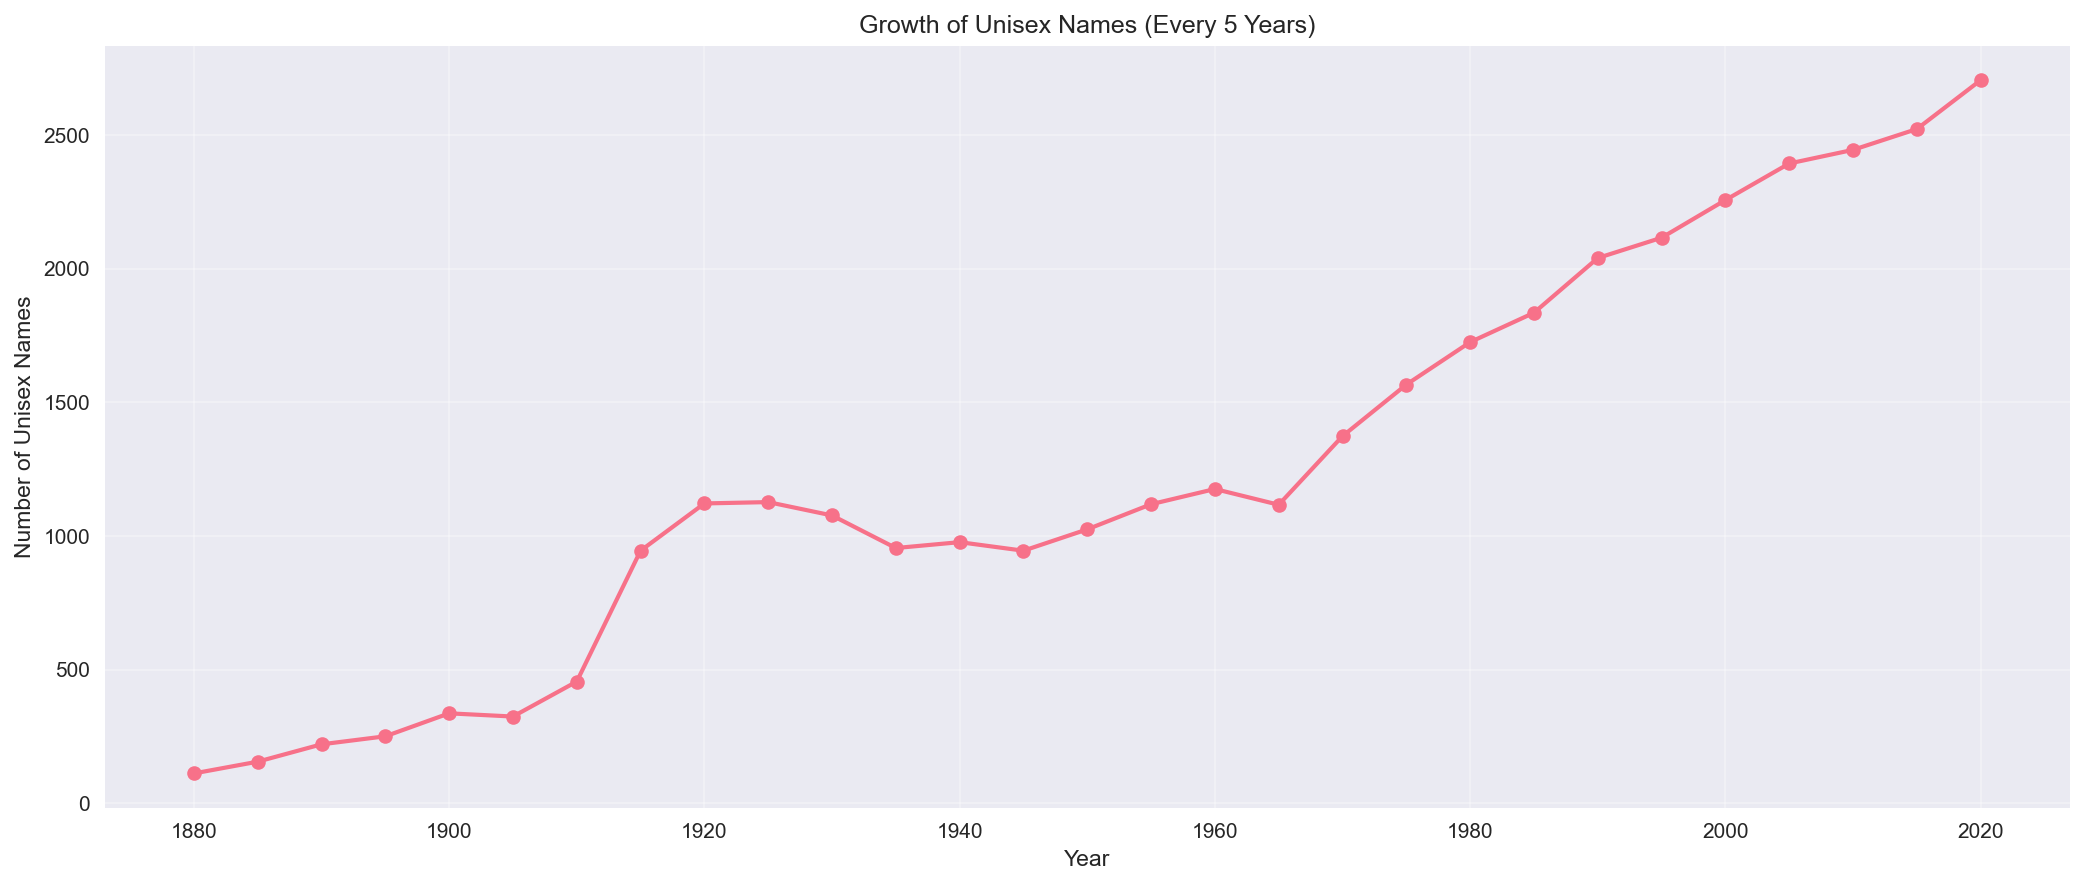

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))
unisex_trend = []
for year in range(1880, 2025, 5):
    year_data = babynames[babynames['year']==year]
    names_both = set(year_data[year_data['sex']=='F']['name']) & set(year_data[year_data['sex']=='M']['name'])
    unisex_trend.append((year, len(names_both)))

years, counts = zip(*unisex_trend)
ax.plot(years, counts, 'o-', linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unisex Names')
ax.set_title('Growth of Unisex Names (Every 5 Years)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

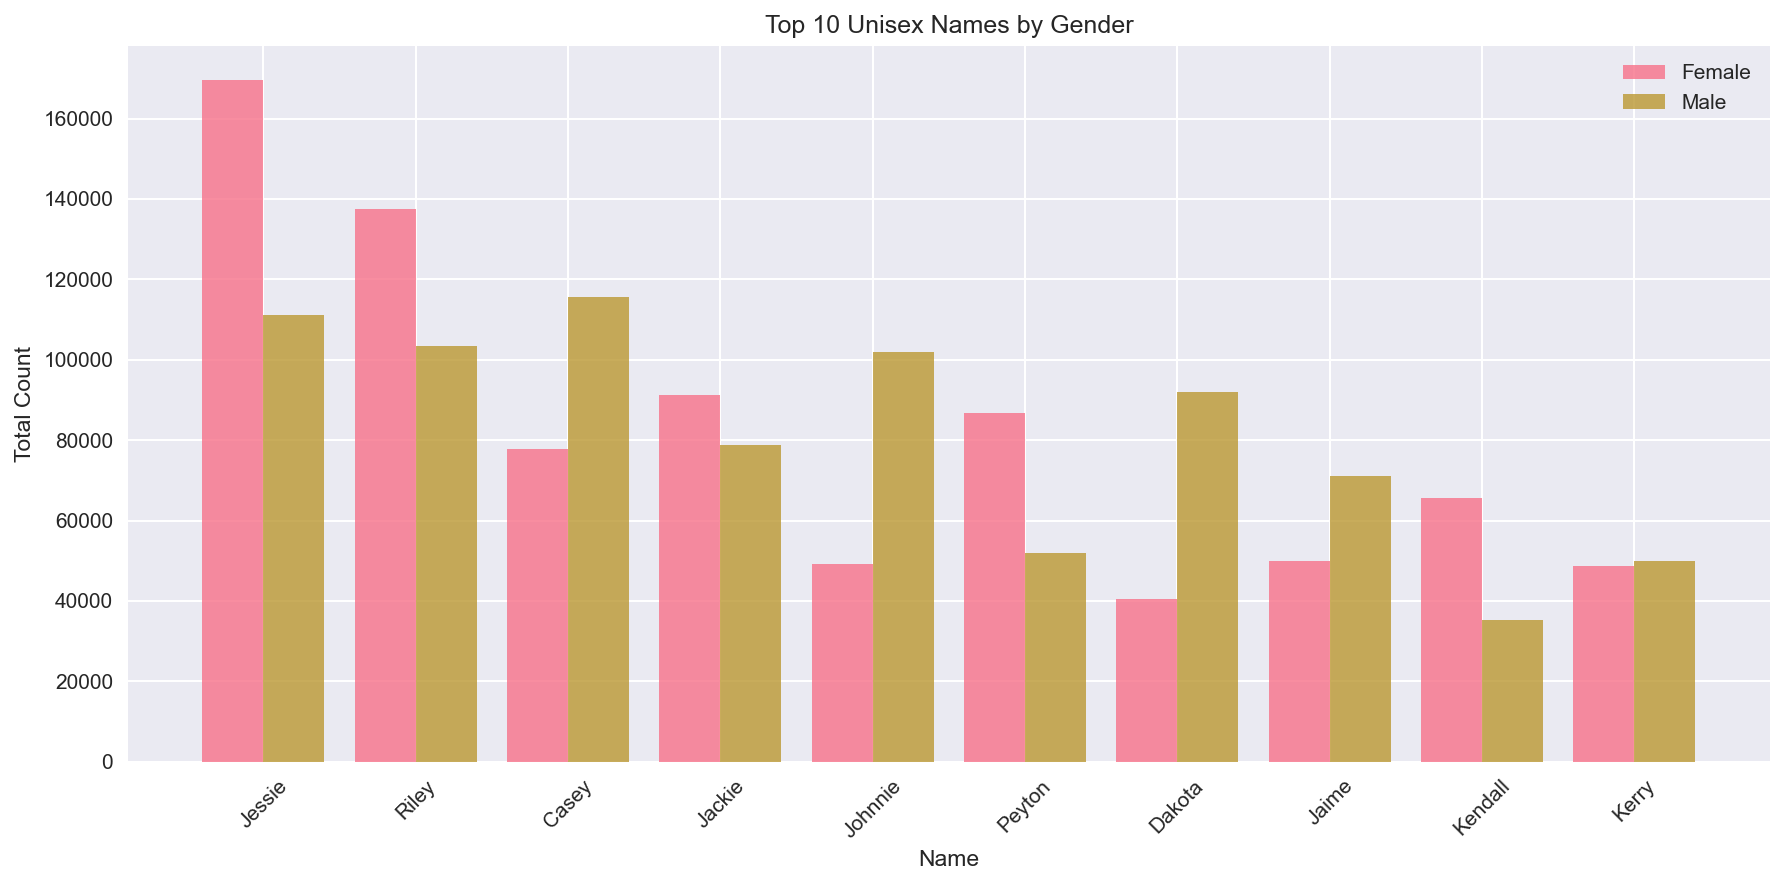

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
top_unisex = unisex_names.head(10)
x = range(len(top_unisex))
ax.bar([i - 0.2 for i in x], top_unisex['F'], 0.4, label='Female', alpha=0.8)
ax.bar([i + 0.2 for i in x], top_unisex['M'], 0.4, label='Male', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels(top_unisex.index, rotation=45)
ax.set_xlabel('Name')
ax.set_ylabel('Total Count')
ax.set_title('Top 10 Unisex Names by Gender')
ax.legend()
plt.tight_layout()
plt.show()